In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib




 



In [13]:
# Check for NaN values in y_train
nan_count = y_train.isna().sum()
print(f"Number of NaN values in y_train: {nan_count}")
y_train = y_train.fillna(0) 
print(f"Number of NaN values in y_train: {nan_count}")

Number of NaN values in y_train: 0
Number of NaN values in y_train: 0


In [3]:

# Load the data (in case you're starting fresh)
X_train_selected = joblib.load('../data/X_train_selected.pkl')
X_test_selected = joblib.load('../data/X_test_selected.pkl')
y_train = joblib.load('../data/y_train.pkl')
y_test = joblib.load('../data/y_test.pkl')

In [4]:
# Initialize the models
models = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier()
}

# Dictionary to store model performance
model_performance = {}

Number of NaN values in y_train: 0
Number of NaN values in y_train: 0


In [9]:
# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_selected, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_selected)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_performance[model_name] = accuracy
    
    # Print classification report
    print(f"--- {model_name} ---")
    print(classification_report(y_test, y_pred))

--- Multinomial Naive Bayes ---
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1452
         1.0       0.93      0.90      0.92       220

    accuracy                           0.98      1672
   macro avg       0.96      0.95      0.95      1672
weighted avg       0.98      0.98      0.98      1672

--- Decision Tree ---
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1452
         1.0       0.92      0.85      0.89       220

    accuracy                           0.97      1672
   macro avg       0.95      0.92      0.94      1672
weighted avg       0.97      0.97      0.97      1672



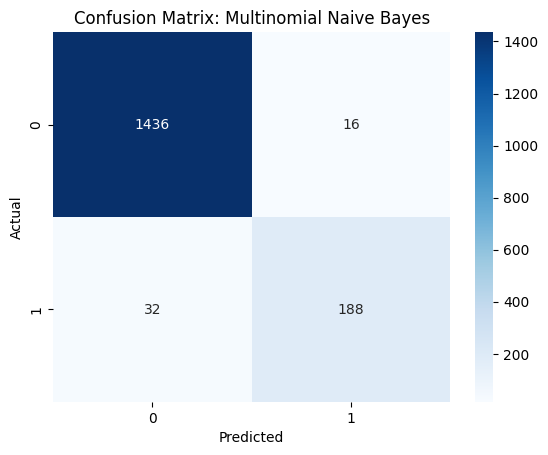

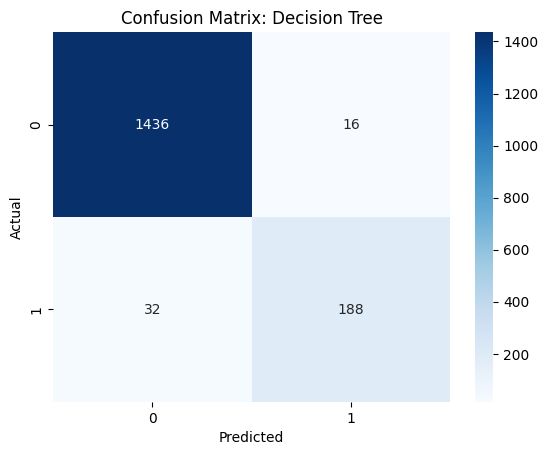

In [14]:
for model_name, model in models.items():   
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [11]:
# Print model comparison
print("Model Performance Comparison:")
for model_name, accuracy in model_performance.items():
    print(f"{model_name}: {accuracy:.4f}")


Model Performance Comparison:
Multinomial Naive Bayes: 0.9785
Decision Tree: 0.9713


In [15]:
import joblib

# Assuming you've trained the Multinomial Naive Bayes model and it's named 'model'
model = MultinomialNB()
model.fit(X_train_selected, y_train)  # Training the model (if not already trained)

# Save the trained model
joblib.dump(model, '../data/multinomial_nb_model.pkl')


['../data/multinomial_nb_model.pkl']

In [19]:
import joblib
from sklearn.feature_extraction.text import CountVectorizer


# Assuming you've already vectorized the training data
vectorizer = CountVectorizer(max_features=1000)  # Ensure max_features matches
X_train_vectorized = joblib.load('D:\\email_spam_classifier\\data\\X_train_vectorized.pkl')

model = MultinomialNB()


NameError: name 'X_train' is not defined